# Lab 1 : PAC Learnability, Hypothesis, Regression

---


Total Points: **90**

Tentative Weightage : **9%**

Submission Deadline :  **$13^{th}$ Feburary 2023 , 10:00 AM** (3 weeks)

Submit a separate report to mention any observations asked in the corresponding questions. Without these observations, no points will be provided for the corresponding question.
---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations (report pdf) should be made part of the assignment.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a separate pdf file) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
11. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
12. In case of any queries regarding Lab 1, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**


**TASK 1**:                                                      **(18 Marks)**

Create a dataset $\mathcal{D} = (x_i,y_i)_{i=1}^N$ where each $x_i$ is a point in one dimension and each $y_i$ is a binary label i.e. $y_i = \{0,1\}$. First generate the vector $Y$ where each example will take $y_i = 1$ with probability $1/2$ and $y_i = 0$ with probability $1/2$ with $N = 30$. Now fixing the $y_i$, sample the $X$ matrix as follows: 


1. If $y_i = 1$ then $x_i \sim \mathcal{N}(3,1)$ where $\mathcal{N}(a,b)$ represent the gaussian distribution with mean $a$ and standard deviation $b$.
    
2. If $y_i = 0$ then $x_i \sim \mathcal{N}(9,1)$. 
   
  
Implement the following with respect to the above generated dataset:

1. Color code the examples with $y_i = 1$ as red and $y_i=0$ as green and plot the dataset.  **[3 Marks]**
2. Find a threshold hypothesis when hypothesis class is considered as all possible threshold classifier. Plot both the obtained hypothesis along with the dataset.  **[5 Marks]**
3. What is generalization error for the above distribution with respect to best threshold hypothesis $\theta^*$. Plot the empirical error against different value of $N$. Mention what minimum value of $N$ is required to reach $\theta^*$  **[10 Marks]**


Write your code by creating cells below.


In [7]:
#Imports

import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [90]:
''' Class to store the dataset '''
class dataSet():
  
  ''' Constructor to initialize the dataset '''
  def __init__(self, N: int, N0: tuple, N1: tuple): # N0 and N1 are tuples of the form (mean, variance) of yi = 0 and yi = 1 respectively
    self.N = N
    self.generateRandomData(N0, N1)

  def __getitem__(self, index:int):
    return (self.X[index], self.Y[index])

  def __setitem__(self, index:int, data:map):
    self.X[index], self.Y[index] = data
  
  def __len__(self):
    return len(self.X)
  
  def __del__(self):
    del self.X
    del self.Y
    del self.N
  
  def __iter__(self):
    self.curIndex = 0
    return self
  
  def __next__(self):
    if self.curIndex >= len(self.X):
      raise StopIteration
    else:
      self.curIndex+=1
      return self.X[self.curIndex-1], self.Y[self.curIndex-1]
  
  def __repr__(self):
    for i in self:
      x, y= i
      print("X: ", x, "Y: ", y)
    return ''
      
  def generateRandomData(self, N0: tuple, N1: tuple):
    self.Y = np.array([random.randint(0,1) for i in range(self.N)]) # Generate random Y
    self.X=np.array([0.0 for i in range(self.N)]) # Initialize X
    for i in range(self.N): 
      if self.Y[i] == 0:
        self.X[i] = np.random.normal(N0[0], N0[1])  # Generate random X
      else:
        self.X[i] = np.random.normal(N1[0], N1[1])  # Generate random X
  
  def plot(self):
    ''' Plot the dataset obtained'''
    colorCode =['green', 'red']
    for i in range(self.N):
      plt.scatter(self.X[i], 0, c=colorCode[self.Y[i]])
    plt.xlabel("X")
    plt.xticks(
        np.arange(
            int(min(self.X)),int(max(self.X)+1)
            )
        )
    plt.tick_params(left=False, labelleft= False)
    plt.show()
  

In [91]:
''' Printing the dataset '''

N= 30
data = dataSet(N, (9, 1), (3, 1))
print(data)


X:  4.052312040478373 Y:  1
X:  2.1525966882126832 Y:  1
X:  8.402314038801707 Y:  0
X:  9.483925705380347 Y:  0
X:  2.9569855262698455 Y:  1
X:  5.084030210201343 Y:  1
X:  1.7720091025831184 Y:  1
X:  10.517380254826852 Y:  0
X:  8.563917563009738 Y:  0
X:  2.107027029506264 Y:  1
X:  7.108475240172136 Y:  0
X:  7.684399531257511 Y:  0
X:  8.499155142580186 Y:  0
X:  3.8236479201512843 Y:  1
X:  11.153272321724842 Y:  0
X:  2.7921963098986486 Y:  1
X:  8.412502179670021 Y:  0
X:  2.492599704917472 Y:  1
X:  2.88440875394003 Y:  1
X:  3.8320946856620206 Y:  1
X:  1.6400153834380053 Y:  1
X:  8.354809651883961 Y:  0
X:  9.153064838660256 Y:  0
X:  2.267591008634301 Y:  1
X:  2.1557940061508885 Y:  1
X:  7.518879853658643 Y:  0
X:  9.921747563064987 Y:  0
X:  8.661673189775314 Y:  0
X:  8.513834707932531 Y:  0
X:  9.942863553153531 Y:  0



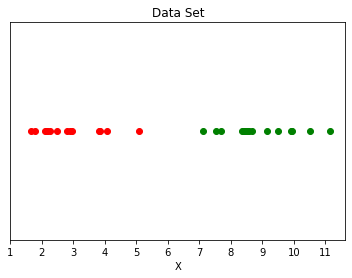

In [92]:
'''a). Plotting the dataset generated'''
plt.title('Data Set')
data.plot()

In [93]:
''' b). Implementing the threshold hypothesis '''

'''A function for bisect right(upper bound))'''
def bisect_right(arr, num):
    low = 0
    high = len(arr)
    while low<high:
        mid = (low+high)//2
        if arr[mid]<=num:
            low = mid+1
        else:
            high = mid
    return low

'''A function to generate the threshold hypothesis for the dataset using Emperical Risk Minimization'''
def thresholdHypothesis(data: dataSet):
    greenPoints = []                            #List to store the green points
    redPoints = []                              #List to store the red points
    for x,y in data:                    #Iterating over the dataset
        if y==0:                            #If the point is green
            greenPoints.append(x)       #Append it to the greenPoints list
        else:                           #Else
            redPoints.append(x)             #Else append it to the redPoints list
    greenPoints.sort()                  #Sort the greenPoints list
    redPoints.sort()                        #Sort the redPoints list
    totalred = len(redPoints)           #Total number of red points
    totalgreen = len(greenPoints)       #Total number of green points
    if totalred==0:                 #If there are no red points, then the threshold is the first green point
        return greenPoints[0]-1
    threshold = -float('inf')       #Initialize the threshold to -infinity
    error = totalred                #At -infinity, the error is the total number of red points
    for i in range(totalred):       #Iterate over the red points
        curError = totalred-i-1     #The error from the red points is the number of red points on the right of the current red point
        j = bisect_right(greenPoints, redPoints[i]) #Find the number of green points on the left of the current red point
        curError+=j                                 #Add the number of green points on the left of the current red point to the error
        if curError<error:  
            error= curError                             #If the error is less than the current error, update the error
            if j==totalgreen:
                threshold = redPoints[i]
            else:
                threshold = (redPoints[i]+greenPoints[j])/2 #Set the threshold as the average of the current red point and the next green point
    
    if type(threshold) == float:
        return greenPoints[0]-1                #If the threshold is still -infinity, then the threshold is the first green point
    else:
      return threshold

''' Plotting and calculating the hypothesis '''
def plotHypothesis(data: dataSet):
    threshold = thresholdHypothesis(data)
    print("Threshold: ", threshold)
    plt.axvline(x = threshold, color = 'b', label = 'Threshold hypothesis')
    plt.legend()
    data.plot()
    

Threshold:  6.096252725186739


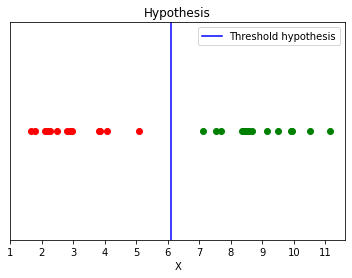

In [94]:
plt.title('Hypothesis')
plotHypothesis(data)

In [95]:

''' The threshold Predictor'''
def getYValue(x, threshold):
    if x<=threshold:
        return 1
    else:
        return 0

'''Calculates Emperical Error'''
def empericalError(data: dataSet, threshold):
    error = 0
    for x,y in data:
        if getYValue(x, threshold)!=y:
            error+=1
    return error/len(data)




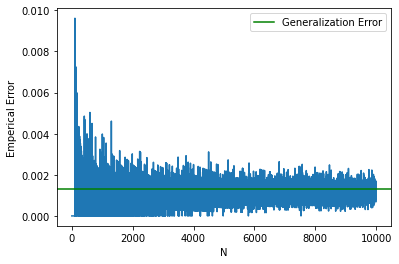

In [96]:
''' c). Best value for the threshold '''
''' We got the generalisation error for the best possible threshold to be as 0.0013 which is 0.13%'''
''' Calculating the emperical error for each value from 1 to N '''



N = 10000
generalisationError = 0.0013 # Calculated in percentage
plt.plot()
x = []
y = []
for i in range(1,N+1):
    data = dataSet(i, (9, 1), (3, 1))       #Generate a dataset for each value of N
    hypothesis = thresholdHypothesis(data)      #Find the threshold hypothesis for the dataset
    error = empericalError(data, hypothesis)    #Find the emperical error for the dataset
    x.append(i)
    y.append(error)
plt.plot(x,y)                            #Plot the emperical error for each value of N
plt.axhline(y = generalisationError, color = 'g', label = 'Generalization Error')
plt.legend()
plt.xlabel('N')
plt.ylabel('Emperical Error')
plt.show()
    

**TASK 2**:                                                      **(35 Marks)**

In this question, we will repeat the experiments discussed in the class with respect to polynomial regression but with a different function. 

Generate $20$ data points from function $f(x) = sin{(\pi x/8)} + \frac{x}{12\pi} + \text{noise}$ where noise$\sim \mathcal{N}(0,0.2)$ with $x$ ranging from $0$ to $10$.  **[3 Marks]**

1. Fit a polynomial regression with optimal weight vector $w^*$ computed via analytical method (using idea of matrices taught in class) and plot the curves for different degree of polynomials $M=2,4,5,7,10$. Explain your observations by plotting the data points generated and the curve obtained for different values of $M$.  **[10 Marks]**

2. Fit a polynomial regression using gradient descent for different degree of polynomials $M=2,4,5,7,10$. Explain your observations by plotting the data points generated and the curve obtained for different values of $M$.  **[10 Marks]**

3. Repeat the previous experiments with more number of data points and report your findings. More specifically, compare the above two approaches with respect to the solution obtained with respect to each value of M **[6 Marks]**

4. Plot runtime of both methods against variation with respect to $M$.
 **[3 Marks]**

5. Plot runtime of both methods against variation with respect to number of datapoints.  **[3 Marks]**

**Use of sci-kit or any direct implementation of linear regression is striclty probhibted. You can use numpy and pandas.**
Write your code by creating cells below.


In [97]:
''' Making a class to store and generate data for the regression problem '''
'''Defining the function f(x)'''
def f(x):
    return  np.sin((x*np.pi)/8) + x/(12*np.pi)

'''Plots the actual data generating function'''
def plotf(interval: tuple, totalPoints: int =1000):
    x = np.linspace(interval[0], interval[1], totalPoints)
    y = f(x)
    plt.plot(x,y, color ='black', label = 'Actual Curve')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')


''' Class to store the dataset '''
class regressionDataSet():
  
  ''' Constructor to initialize the dataset '''
  def __init__(self, N: int, noise: tuple, interval: tuple): # N0 and N1 are tuples of the form (mean, variance) of yi = 0 and yi = 1 respectively
    self.N = N
    self.generateRandomData(noise, interval)

  def __getitem__(self, index:int):
    return (self.X[index], self.Y[index])

  def __setitem__(self, index:int, data:map):
    self.X[index], self.Y[index] = data
  
  def __len__(self):
    return len(self.X)
  
  def __del__(self):
    del self.X
    del self.Y
    del self.N
  
  def __iter__(self):
    self.curIndex = 0
    return self
  
  def __next__(self):
    if self.curIndex >= len(self.X):
      raise StopIteration
    else:
      self.curIndex+=1
      return self.X[self.curIndex-1], self.Y[self.curIndex-1]
  
  def __repr__(self):
    for i in self:
      x, y= i
      print("X: ", x, "Y: ", y)
    return ''
   
  def generateRandomData(self, noise: tuple, interval: tuple):
    noiseMean, noiseVariance = noise
    self.X = np.random.uniform(interval[0], interval[1], self.N)  #Get N uniform random numbers in the interval
    self.Y = np.array([f(x)+np.random.normal(noiseMean, noiseVariance) for x in self.X])  #Get the corresponding Y values by adding noise to the actual function
  
  
  def plot(self):
    '''Plots the data points'''
    plt.scatter(self.X, self.Y, label = 'Data points', color = 'b')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
  
  
''' A class for polynomial Regression '''
class polynomialRegression():
  
  def __init__(self, data: regressionDataSet, degree: int):
    self.data = data
    self.degree = degree
    self.X = np.array([np.array([np.power(x,i) for i in range(degree+1)]) for x in data.X])
    self.W = np.zeros(degree+1)
    self.Y = data.Y
    self.N = len(data)
    self.done = False
  
  def __repr__(self):
    if not self.done:
      raise Exception ("Please train the data first")
    return "p(x) = " + " + ".join([str(self.W[i])+"x^"+str(i) for i in range(self.degree, 0, -1)] + [str(self.W[0])])
  
  def p(self, x):
    if not self.done:
      raise Exception ("Please train the data first")
    return sum([self.W[i]*np.power(x, i) for i in range(self.degree+1)])
  
  def calculateError(self):
    if not self.done:
      raise Exception ("Please train the data first")
    return sum([(self.p(x)-y)**2 for x,y in self.data])/(2*self.N)
  
  def trainAnalytical(self):
    self.W = np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T).dot(self.Y)  #Using the formula W = (X.T*X)^-1 * X.T * Y
    self.done = True
    
  def trainGradientDescent(self, epochs: int, learningRate: float = 1, tolerance: float = -1):
    if tolerance==-1:
      if epochs!=0:
        tolerance = 1/epochs
      else:
        tolerance=0.1
    self.done = True
    prevError = self.calculateError() #Calculating the error before training
    iteration = 0 #To keep track of the number of iterations
    while iteration<epochs:
      gradient = (1/self.N)*self.X.T.dot(self.X.dot(self.W)-self.Y)   #Calculating the gradient
      self.W = self.W- learningRate*gradient  #Updating the weights as per current learning rate
      curError = self.calculateError()      #Calculating the error after updating the weights
      if curError > prevError:              #If the error increases, we reduce the learning rate by half and try again
        self.W+=learningRate*gradient    #Undoing the update
        learningRate/=2                #Reducing the learning rate
        continue                  #Trying again
      if abs(prevError - curError) < tolerance: #If the error is less than the tolerance, we stop training
        break
      iteration+=1
      prevError = curError  #Updating the error for the next iteration
      
    
  def plot(self, interval: tuple, totalPoints: int = 1000):
    if not self.done:
      raise Exception ("Please train the data first")         #If the data is not already trained, we raise exception
    x = np.linspace(interval[0], interval[1], totalPoints)
    y = np.array([self.p(i) for i in x])
    plt.plot(x,y, label = 'Regression Polynomial', color = 'r')
    plt.legend()

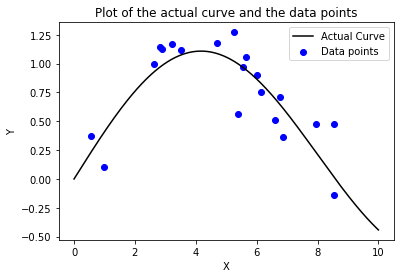

In [98]:
''' Generating the dataset '''
data = regressionDataSet(20, noise = (0, 0.2), interval = (0, 10))
plotf((0,10))
plt.title('Plot of the actual curve and the data points')
data.plot()
plt.show()

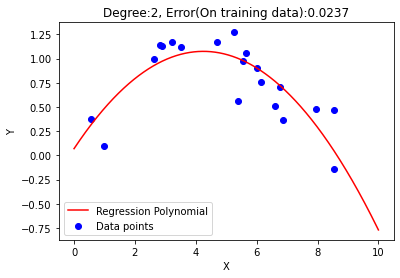

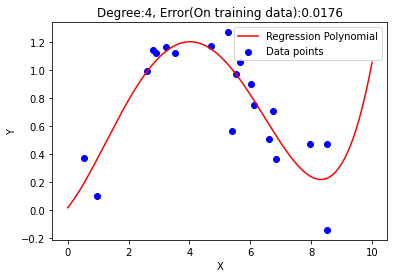

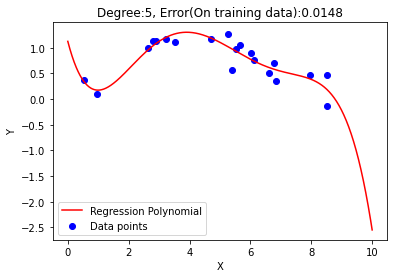

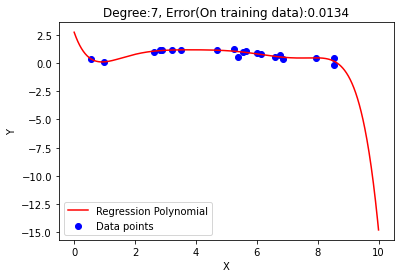

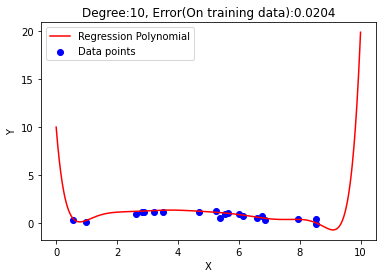

In [99]:
''' a). Training the data by polynomial regression(By analytical Method) '''

polynomials = [
    polynomialRegression(data, 2),
    polynomialRegression(data, 4),
    polynomialRegression(data, 5),
    polynomialRegression(data, 7),
    polynomialRegression(data, 10),
]


for polynomial in polynomials:
    data.plot()
    polynomial.trainAnalytical()
    polynomial.plot((0,10), totalPoints=1000)
    plt.title("Degree:{}, Error(On training data):{}".format(polynomial.degree, round(polynomial.calculateError(),4)))
    plt.show()

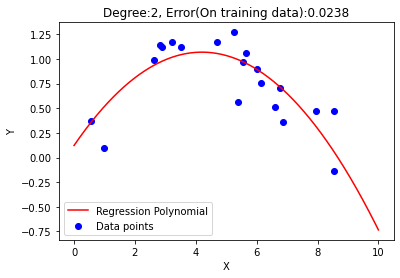

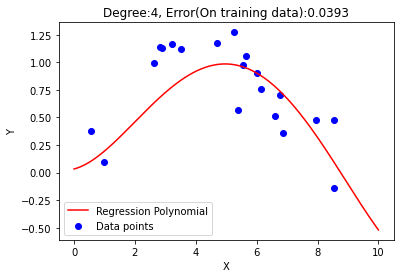

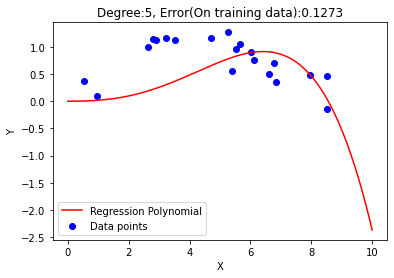

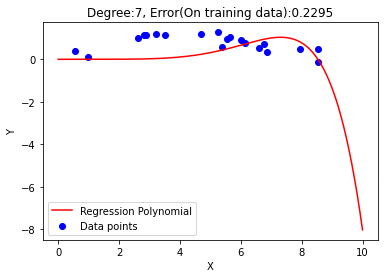

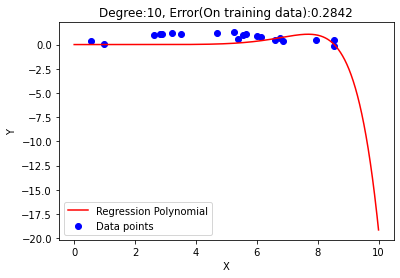

In [100]:
''' b). Training the data by polynomial regression(By gradient descend) '''

polynomials = [
    polynomialRegression(data, 2),
    polynomialRegression(data, 4),
    polynomialRegression(data, 5),
    polynomialRegression(data, 7),
    polynomialRegression(data, 10),
]


for polynomial in polynomials:
    data.plot()
    polynomial.trainGradientDescent(epochs = 1000000, tolerance=10e-9)  #Increase the tolerance to make it run fast
    polynomial.plot((0,10), totalPoints=1000)
    plt.title("Degree:{}, Error(On training data):{}".format(polynomial.degree, round(polynomial.calculateError(),4)))
    plt.show()

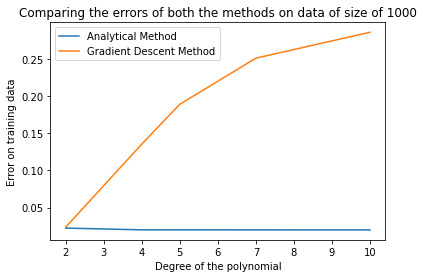

In [101]:
'''c). Comparing the results of both the methods '''

''' Comparing the results based on the error on the training data for both the methods '''
M = [2, 4, 5, 7, 10]
largeData = regressionDataSet(1000, noise = (0, 0.2), interval = (0, 10)) #Decrease number of data points to make it faster
analticalError = []
gradientDescentError = []
for degree in M:
    analytical = polynomialRegression(largeData, degree)
    analytical.trainAnalytical()
    gradientDescent = polynomialRegression(largeData, degree)
    gradientDescent.trainGradientDescent(epochs = 1000000, tolerance=10e-7) #Decrease the tolerance to get results faster
    analticalError.append(analytical.calculateError())
    gradientDescentError.append(gradientDescent.calculateError())
plt.plot(M, analticalError, label = 'Analytical Method')
plt.plot(M, gradientDescentError, label = 'Gradient Descent Method')
plt.legend()
plt.xlabel('Degree of the polynomial')
plt.ylabel('Error on training data')
plt.title('Comparing the errors of both the methods on data of size of {}'.format(len(largeData)))
plt.show()

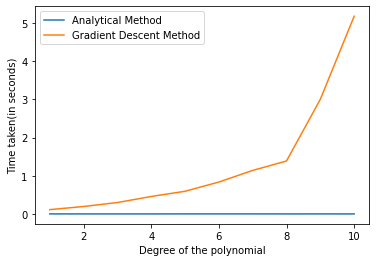

In [102]:
''' d). Comparing the time taken by both the methods for different degrees of the polynomial '''

MAX_M = 10
largeData = regressionDataSet(1000, noise = (0, 0.2), interval = (0, 10))

M= np.array(range(1, MAX_M+1))
timeAnalytical = np.zeros(MAX_M)
timeGradientDescent = np.zeros(MAX_M)

for degree in range(1, MAX_M+1):
    analytic = polynomialRegression(largeData, degree)
    gradientDescent = polynomialRegression(largeData, degree)
    
    timeStart = time.time()
    analytic.trainAnalytical()
    timeAnalytical[degree-1] = time.time()-timeStart        #Storing the time taken for each degree by analytical method
    
    timeStart = time.time()
    gradientDescent.trainGradientDescent(epochs = 1)        
    timeGradientDescent[degree-1] = time.time()-timeStart   #Storing the time taken for each degree by gradient descend
    
plt.plot(M, timeAnalytical, label = 'Analytical Method')
plt.plot(M, timeGradientDescent, label = 'Gradient Descent Method')
plt.xlabel('Degree of the polynomial')
plt.ylabel('Time taken(in seconds)')
plt.legend()
plt.show()



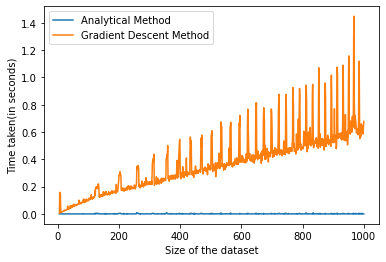

In [103]:
''' e). Comparing time for different sizes of the dataset '''

M = 5

sizeLow = M
sizeHigh =1000
dataSetSize = np.array(range(sizeLow, sizeHigh+1))
timeAnalytical = np.zeros(len(dataSetSize))
timeGradientDescent = np.zeros(len(dataSetSize))

for size in range(sizeLow, sizeHigh+1):
    tempData = regressionDataSet(size, noise = (0, 0.2), interval = (0, 10))
    polynomial = polynomialRegression(tempData, M)
    timeStart = time.time()
    polynomial.trainGradientDescent(epochs = 10000)
    timeGradientDescent[size-sizeLow] = time.time()-timeStart   #Storing the time taken for each degree by gradient descend
    timeStart = time.time()
    polynomial.trainAnalytical()
    timeAnalytical[size-sizeLow] = time.time()-timeStart        #Storing the time taken for each degree by analytical method


plt.plot(dataSetSize, timeAnalytical, label = 'Analytical Method')
plt.plot(dataSetSize, timeGradientDescent, label = 'Gradient Descent Method')
plt.xlabel('Size of the dataset')
plt.ylabel('Time taken(in seconds)')
plt.legend()
plt.show()

#Adult Dataset

###About the Dataset
The data set contains information of 32562 individuals from the 1994
census, of which 21790 are males and 10771 are females. We choose six attributes as feature set: age, fnlwgt, education_num, capital_gain, hours_per_week, sex. Our goal is to predict captial_gain using other attributes. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/adult) 


**TASK 3**:                                                      **(37 Marks)**

We will be understanding the concept of linear regression along with the regularization parameter on the Adult dataset which has multiple attributes. 

0. Load Adult Dataset into pandas dataframe and print it. You can randomly subsample dataset size to $10,000$ points.  
1. **Feature Normalization:** As discussed in the class, we first have to standardize all the features by subtracting with the mean and dividing by the standard deviation. Verify your technique by computing the mean and variance of the transformed data and check if the mean is $0$ and variance is $1$.  **[2 Marks (1+1) ]**

2. **$K-$Fold Cross Validation:** Randomly partition the data into a training and test set. Fix 20\% of the instances into the test set. With the remaining create training and validation sets with $K-$fold cross validation. You can take the value of $K$ to be 10.  **[3 Marks]**

3. **Stratisfied $K$-fold cross validation**: Create a balanced dataset such that each training and validation set contain balanced data representation. For the Adult dataset, consider balanced with respect to gender (male/female).Fix 20\% of the instances into the test set. Then with the remaining create balanced training and validation dataset by keeping the value of $K$ to be 10. To read more refer https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/  **[3 Marks]**

4. **Lasso-Regression:** Here, implement your own function LassoRegUnfair$(X, Y, \lambda)$ that calculates the linear least square solution with the lasso regression penalty parameter $\lambda$ and return regression weights. Use gradient descent technique to find these weights. Implement PredLassoRegUnfair(X, weights) that returns $Y$ given the input $X$ with learnt weights. (Use datasets obtained using $K$-fold cross validation (For exact definition of Lasso see the side notes below).  **[10 Marks]**

5. Repeat previous part with dataset obtained using statisfied $K$-fold validation i.e. implement LassoRegFair$(X, Y, \lambda)$  and PredLassoRegFair(X, weights).  **[10 Marks]**

6. Plot the mean square error for each of the dataset obtained from $K-$fold cross validation with respect to different $\lambda$ values. Explain your finding and suggest what value of $\lambda$ will you choose based on the obtained plot.  **[3 Marks]**

7. Plot the mean square error for each of the dataset obtained from stratisfied $K-$fold cross validation with respect to different $\lambda$ values. Explain your finding and suggest what value of $\lambda$ will you choose based on the obtained plot. Compare results with unfair model i.e. model prepared with random paritions. Such fairness is called **social fairness** in literature (refer sideNotes below).  **[3 Marks]** 

8.  Plot the training error, variance and test error against different values of $\lambda$ on datasets generated using $K$-fold validation.  Explain your finding and suggest what value of $\lambda$ will you choose based on the obtained plot. Explain your result in the context of bias variance trade off.
 **[3 Marks]**


Write your code by creating cells below.


In [8]:
''' a). Loading the dataset'''

fileName = './adult.data'
attributes = ['age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income'
]

completeData = pd.read_csv(fileName,  names = attributes)
filteredAttributes = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'hours-per-week', 'sex']
adultDataSet = completeData[filteredAttributes].sample(10000)

genderMapping = {
    ' Male': 1,
    ' Female': 0
}

adultDataSet['sex'] = [genderMapping[i] for i in adultDataSet['sex']]
print(adultDataSet.head())  #Printing some rows of the dataset


       age  fnlwgt  education-num  capital-gain  hours-per-week  sex
11451   27  147951              9             0               1    1
9000    58  266707              2             0              18    1
25293   40  388725             10             0              40    1
18521   26  272618             13             0              55    1
10512   37  100508              9             0              40    1


In [9]:
''' 1). Normalising the data '''

for attribute in filteredAttributes:
    adultDataSet[attribute] = (adultDataSet[attribute] - adultDataSet[attribute].mean())/adultDataSet[attribute].std()

means = adultDataSet.mean()
variances = adultDataSet.var()
print("Mean of the attributes: \n", means)
print("Variance of the attributes: \n", variances)

Mean of the attributes: 
 age               1.023182e-16
fnlwgt            5.044853e-17
education-num    -2.529532e-16
capital-gain     -8.526513e-18
hours-per-week   -1.776357e-17
sex               7.709389e-17
dtype: float64
Variance of the attributes: 
 age               1.0
fnlwgt            1.0
education-num     1.0
capital-gain      1.0
hours-per-week    1.0
sex               1.0
dtype: float64


In [10]:
'''2). Creating K-folds Cross Validation of the dataset'''

K = 10
testData = adultDataSet.sample(frac=0.2)
trainingData = adultDataSet.drop(testData.index)        #Dropping the test data from the total dataset
'''Creating K folds of the training data'''
folds = []
totalSize = len(trainingData)
for i in range(K):
    folds.append(trainingData.sample(totalSize//K))
    trainingData = trainingData.drop(folds[i].index)
#Putting the remaining data in the first fold
folds[0] = pd.concat([folds[0], trainingData])

In [11]:
'''3). Creating Stratified K-folds Cross Validation of the dataset'''
''' A function to print gender ratio of the dataset'''
def printGenderRatio(maleData: pd.DataFrame, femaleData: pd.DataFrame, name: str):
    print("Male:Female Ratio in {}: ".format(name), len(maleData)/len(femaleData))

K=10
fraction = 0.2
maleData = adultDataSet.loc[adultDataSet['sex']>0]  #Males will have positive z scores as per the assignment
femaleData = adultDataSet.drop(maleData.index)      #Dropping males from the dataset to get all dataset for females
printGenderRatio(maleData, femaleData, "the complete dataset")  


maleSampled = maleData.sample(frac=fraction)        #Sampling the data from each gender in the same ratio
femaleSampled = femaleData.sample(frac=fraction)    
maleData = maleData.drop(maleSampled.index)         #Dropping the sampled data from the original dataset
femaleData = femaleData.drop(femaleSampled.index)   
stratisfiedTestData =pd.concat([maleSampled, femaleSampled]) #Concatenating the sampled data to get the test data
printGenderRatio(maleSampled, femaleSampled, "the test data")   

stratisfiedFolds = []
maleCountInFolds = len(maleData)//K             #Storing the count of data point in each fold for equal distribution
femaleCountInFolds = len(femaleData)//K     
for i in range(K):
    maleSampled = maleData.sample(maleCountInFolds) #Sampling the data for each fold
    maleData = maleData.drop(maleSampled.index)
    femaleSampled = femaleData.sample(femaleCountInFolds)
    femaleData = femaleData.drop(femaleSampled.index)
    stratisfiedFolds.append(pd.concat([maleSampled, femaleSampled]))
    printGenderRatio(maleSampled, femaleSampled, "fold {}".format(i+1))
    
    
#Putting the remaining data in the first fold
stratisfiedFolds[0] = pd.concat([stratisfiedFolds[0], maleData])
stratisfiedFolds[0] = pd.concat([stratisfiedFolds[0], femaleData])

Male:Female Ratio in the complete dataset:  1.9735355337496283
Male:Female Ratio in the test data:  1.9717682020802378
Male:Female Ratio in fold 1:  1.9739776951672863
Male:Female Ratio in fold 2:  1.9739776951672863
Male:Female Ratio in fold 3:  1.9739776951672863
Male:Female Ratio in fold 4:  1.9739776951672863
Male:Female Ratio in fold 5:  1.9739776951672863
Male:Female Ratio in fold 6:  1.9739776951672863
Male:Female Ratio in fold 7:  1.9739776951672863
Male:Female Ratio in fold 8:  1.9739776951672863
Male:Female Ratio in fold 9:  1.9739776951672863
Male:Female Ratio in fold 10:  1.9739776951672863


In [12]:
'''4/5). Making function for LASSO Regression'''

#Same function to be used in both problem 4 and 5
def LassoReg(X,Y,constLembda):
    '''
    X: Training Data with first column as 1s
    Y: Target values(Training)
    constLembda: Regularisation constant
    '''
    weights = np.zeros(X.shape[1])
    learningRate = 0.00001
    epochs = 1000
    for i in range(epochs):
        weights = weights - learningRate*(2*X.T.dot(X.dot(weights)-Y) + constLembda*np.sign(weights))   #Updating weights by gradient descent
    return weights


def PredLassoReg(X, weights):
    '''
    X: Test Data with first column as 1s
    weights: Weights of the model
    '''
    return X.dot(weights)

def MSE(yPred, yTrue):
    '''
    yPred: Predicted values
    yTrue: True values
    '''
    return np.mean((yPred-yTrue)**2)

def computeXY(folds: list, validationFold: int):
    '''
    folds: List of folds for which X is to be calculated
    '''
    
    X= []
    Y = []
    for i in range(len(folds)):
        if i==validationFold:
            continue
        fold = folds[i]
        for index, row in fold.iterrows():
            X.append(np.array([1,
                              row['age'],
                              row['fnlwgt'],
                              row['education-num'],
                              row['hours-per-week'],
                              row['sex']
                              ]))
            Y.append(row['capital-gain'])
    
    return np.array(X), np.array(Y)

def findOptimalLambda(folds: list, logLambdas: list):
    '''
    folds: List of folds for which lambda is to be calculated
    logLambda: List of log values of lambda to be tested
    '''
    MSEs = []
    for logLambda in logLambdas:
        constLambda = pow(2, logLambda)
        error = 0
        for i in range(len(folds)):
            X, Y = computeXY(folds, i)
            weights = LassoReg(X, Y, constLambda)
            
            XTest, YTest = computeXY([folds[i]], -1)
            YPred = PredLassoReg(XTest, weights)
            error+=MSE(YPred, YTest)
        MSEs.append(error/len(folds))

    ymin = min(MSEs)
    xpos = MSEs.index(ymin)
    xval = logLambdas[xpos]
    
    return xval, ymin, MSEs

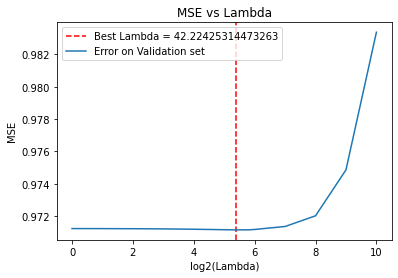

In [13]:
''' 6). Training the model using K-folds Cross Validation on different values of lambda'''

firstLevel = 11
logLambdas =[i for i in range(firstLevel)]
xval, ymin, MSEs = findOptimalLambda(folds, logLambdas) #Finding the best lambda for the first level

secondLevel =5
secondLevelLambdas = [xval + i/secondLevel for i in range(-secondLevel, secondLevel+1)]
xval, ymin, secondLevelMSEs = findOptimalLambda(folds, secondLevelLambdas)

MSEs+=secondLevelMSEs
logLambdas+=secondLevelLambdas
MSEs = np.array(MSEs)
logLambdas = np.array(logLambdas)
inds = np.argsort(logLambdas)
MSEs = MSEs[inds]
logLambdas = logLambdas[inds]
plt.axvline(xval, color='r', linestyle='--', label = "Best Lambda = {}".format(pow(2,xval)))
plt.plot(logLambdas, MSEs, label = "Error on Validation set")
plt.title("MSE vs Lambda")
plt.xlabel("log2(Lambda)")
plt.ylabel("MSE")
plt.legend()
plt.show()

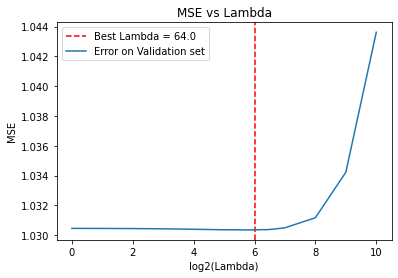

In [14]:
''' 7). Training the model using strastified K-folds Cross Validation on different values of lambda'''

firstLevel = 11
logLambdas =[i for i in range(firstLevel)]
xval, ymin, MSEs = findOptimalLambda(stratisfiedFolds, logLambdas)

secondLevel =5
secondLevelLambdas = [xval + i/secondLevel for i in range(-secondLevel, secondLevel+1)]
xval, ymin, secondLevelMSEs = findOptimalLambda(stratisfiedFolds, secondLevelLambdas)

MSEs+=secondLevelMSEs
logLambdas+=secondLevelLambdas
MSEs = np.array(MSEs)
logLambdas = np.array(logLambdas)
inds = np.argsort(logLambdas)
MSEs = MSEs[inds]
logLambdas = logLambdas[inds]
plt.axvline(xval, color='r', linestyle='--', label = "Best Lambda = {}".format(pow(2,xval)))
plt.plot(logLambdas, MSEs, label = "Error on Validation set")
plt.title("MSE vs Lambda")
plt.xlabel("log2(Lambda)")
plt.ylabel("MSE")
plt.legend()
plt.show()

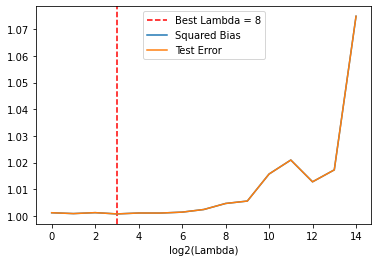

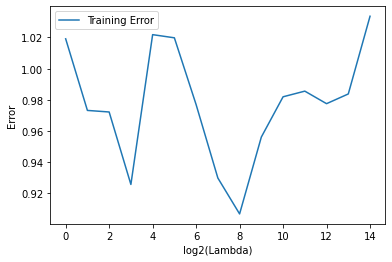

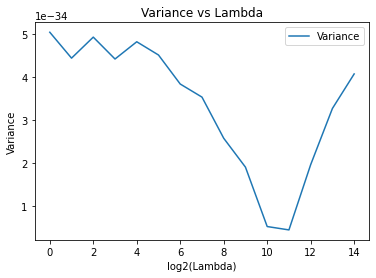

In [15]:
''' 8). Training error, Variance and test error at different values of lambda'''

totalLambda = 15            #Total number of values of lambda to be tested
logLambdas = [i for i in range(totalLambda)]    #List of log values of lambda to be tested
trainingErrors = []         #Stores the training error for each value of lambda
testErrors = []             #Stores the error on test data for each value of lambda
variances = []              #Stores the variance of the predictions for each value of lambda
biases = []                 #Stores the bias of the predictions for each value of lambda
i=0
for logLambda in logLambdas:
    trainingError = 0
    testError = 0
    Preds = []
    XTest, YTest = computeXY([testData], -1)    #Computing X and Y for test data
    for fold in folds:
        XTrain, YTrain = computeXY(folds, i)  #Computing X and Y for training data
        weights = LassoReg(XTrain, YTrain, pow(2, logLambda))
        trainingError+=MSE(PredLassoReg(XTrain, weights), YTrain) #Computing training error
        
        YPred = PredLassoReg(XTest, weights)    #Computing predictions on test data
        Preds.append(YPred)                     #Storing the predictions
        curError=MSE(YPred, YTest)              #Computing error on test data
        testError+=curError
    Preds = np.array(Preds)                     #Converting the list of predictions to numpy array
    avgPred = np.mean(Preds, axis=0)            #Computing the average of the predictions
    trainingErrors.append(trainingError/len(folds)) #Computing the average training error
    testErrors.append(testError/len(folds))         #Computing the average test error
    variances.append(np.mean(np.mean((Preds-avgPred)**2)))  #Computing the variance as the mean of the mean of the squared difference of the predictions and the average prediction
    biases.append(np.mean((avgPred-YTest)**2, axis=0))      #Computing the bias as the mean of the squared difference of the average prediction and the actual value
    
    i+=1

ymin = min(testErrors)
xpos = testErrors.index(ymin)
xval = logLambdas[xpos]

'''Plotting the values'''
plt.axvline(xval, color='r', linestyle='--', label = "Best Lambda = {}".format(pow(2,xval)))
plt.plot(logLambdas, biases, label = "Squared Bias")
plt.plot(logLambdas, testErrors, label = "Test Error")
plt.legend()
plt.xlabel("log2(Lambda)")
plt.show()
plt.plot(logLambdas, trainingErrors, label = "Training Error")
plt.legend()
plt.xlabel("log2(Lambda)")
plt.ylabel("Error")
plt.show()
plt.plot(logLambdas, variances, label = "Variance")
plt.title('Variance vs Lambda')
plt.legend()
plt.xlabel("log2(Lambda)")
plt.ylabel("Variance")
plt.show()

**Side Notes: LASSO Regularization**:
Regularization is implemented to avoid overfitting of the data. LASSO is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

In this shrinkage technique, the coefficients determined in the regression model are penalized by a factor called the alpha α (or sometimes lamda). 
In the equation shown below there are basically two terms one is old least sqaure loss and other term is regularization term. The regularization term consist of a trade-off factor $λ$ followed by weight coefficient $β$'s.

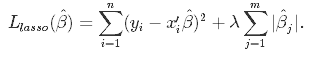

With lambda set to zero, you will find that this is the equivalent of the linear regression model with least sqaure loss. Thus lasso regression shrinks the coefficients and helps to reduce the model complexity and multi-collinearity.

lambda can be any real-valued number between zero and infinity; the larger the value, the more aggressive the penalization is. To read more visit https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

**Side Notes: Social Fairness**:


In real world machine learning deployments it is observed that the standard al
gorithm results in a model which incurs higher cost for females compared to males. Similarly it is even more noticeable among the sensitive (or protected) attribute like racial groups which can take more than two values. In light of this consideration, recent works consider a different objective. Rather than minimizing the cost over the entire dataset, the objective of socially fair model is to find a model that minimizes the average cost across different (protected) groups.

So, in simple words, if your model has loss on males nearly same as loss incured on females then your model is socially fair to group (gender). Thus, you can check if your learned model (here regressor) obeys social fairness or not?

(To read more https://arxiv.org/pdf/2006.10085.pdf).


In [112]:
#Thanks 

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.